<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-правильности-расчета-степени-обогащения" data-toc-modified-id="Проверка-правильности-расчета-степени-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка правильности расчета степени обогащения</a></span></li><li><span><a href="#Анализ-отсутствующих-признаков" data-toc-modified-id="Анализ-отсутствующих-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ отсутствующих признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-концентрации-металлов-на-разных-этапах" data-toc-modified-id="Анализ-изменения-концентрации-металлов-на-разных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменения концентрации металлов на разных этапах</a></span></li><li><span><a href="#Изучение-распределения-размеров-гранул" data-toc-modified-id="Изучение-распределения-размеров-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение распределения размеров гранул</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Напишите-функцию-для-вычисления-sMAPE." data-toc-modified-id="Напишите-функцию-для-вычисления-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишите функцию для вычисления sMAPE.</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-для-предсказания-признака-rougher.output.recovery" data-toc-modified-id="Обучение-модели-для-предсказания-признака-rougher.output.recovery-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Обучение модели для предсказания признака <code>rougher.output.recovery</code></a></span></li><li><span><a href="#Обучение-модели-для-предсказания-признака-final.output.recovery" data-toc-modified-id="Обучение-модели-для-предсказания-признака-final.output.recovery-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Обучение модели для предсказания признака <code>final.output.recovery</code></a></span></li><li><span><a href="#Расчет-финального-sMAPE" data-toc-modified-id="Расчет-финального-sMAPE-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Расчет финального sMAPE</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.inspection import permutation_importance
import optuna

In [2]:
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')

In [3]:
data_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


## Подготовка данных

### Проверка правильности расчета степени обогащения

Вычислим по имеющимся данным параметр `rougher.output.recovery`

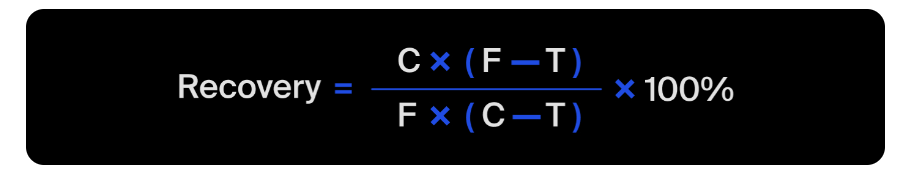

где:
* C — доля золота в концентрате после флотации (rougher.output.concentrate_au)
* F — доля золота в сырье/концентрате до флотации (rougher.input.feed_au)
* T — доля золота в отвальных хвостах после флотации (rougher.output.tail_au)

In [4]:
def recovery(C, F, T):
    return 100 * ((C*(F-T)) / (F*(C-T))) # Перевод значения в проценты

In [5]:
rougher_output_recovery_calculated = recovery(data_train['rougher.output.concentrate_au'], 
                                              data_train['rougher.input.feed_au'], 
                                              data_train['rougher.output.tail_au'])

print(mae(data_train['rougher.output.recovery'], rougher_output_recovery_calculated))

9.682896147825551e-15


Значение коэффициента восстановления золота после флотации посчитано верно.

### Анализ отсутствующих признаков

Исследуем признаки, которых в тестовой выборке нет

In [6]:
set(data_full.columns) - set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Все отсутствующие признаки относятся к параметрам, замеряемым или рассчитываемым в конце стадии переработки.

### Предобработка данных

Целевой метрикой является параметр, зависящий от концентрации золота на разных стадиях тех.процесса. Поэтому в первую очередь нужно проверить обучающую выборку на выбросы в этих признаках

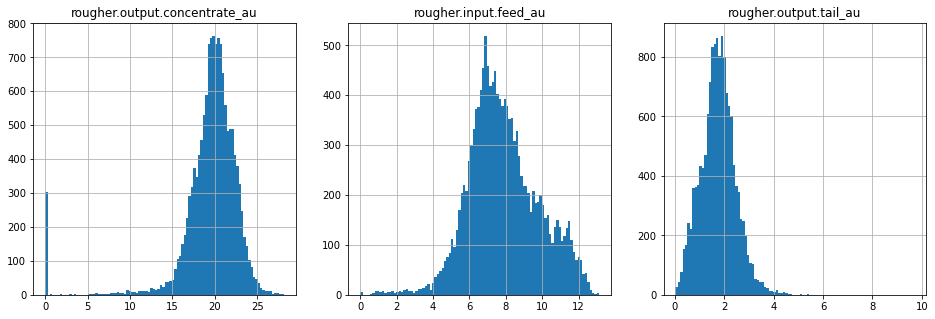

In [7]:
plt.figure(figsize=(16,5))
for i, feature in enumerate(['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']):

    ax = plt.subplot(1,3,i+1)
    data_train[feature].hist(bins=100, ax=ax)
    plt.title(feature)

На одной из гистограмм прослеживается пик в нуле, который является явным выбросом. От него следовало бы избавиться, но он не входит в список признаков, по которым будет проводиться обучение. Хотя этот выброс настораживает.

Проверим остальные признаки обучающей выборки на наличие выбросов.

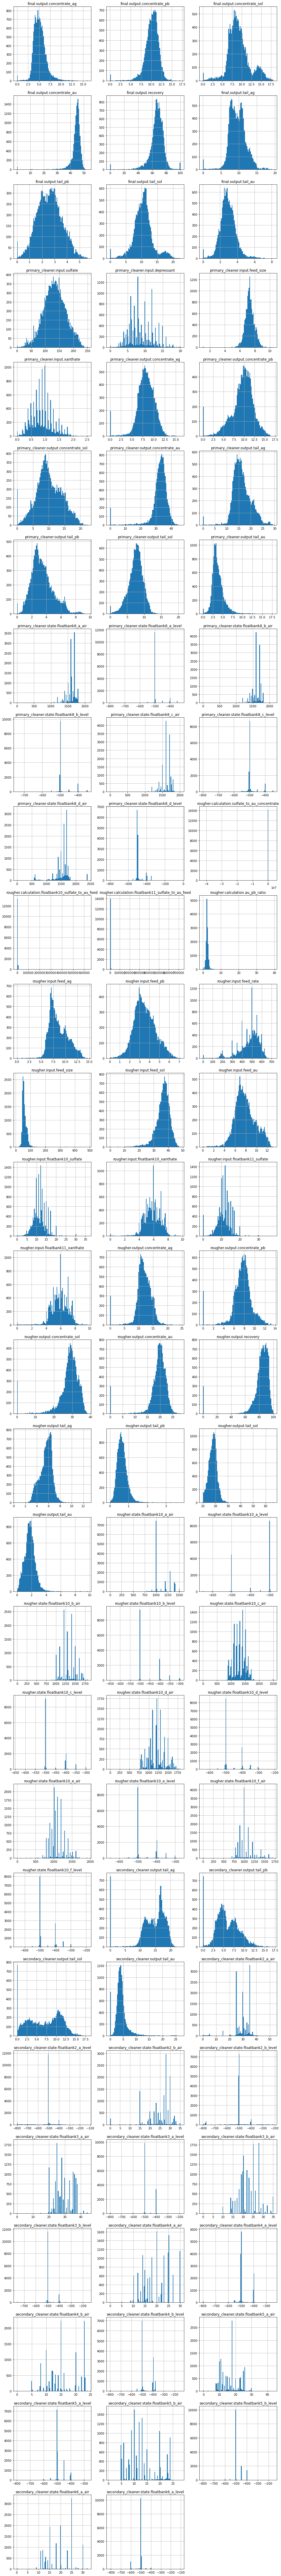

In [8]:
plt.figure(figsize=(16,160))
for i, feature in enumerate(data_train.drop('date', axis=1).columns):
    plt.subplot(len(data_train.drop('date', axis=1).columns)//3 + 1, 3, i+1)
    data_train[feature].hist(bins=100)
    plt.title(feature)

Выбросы есть, но пока мы не определились с важными признаками, удалим выбросы только из `rougher.output.recovery` и `final.output.recovery`, потому что нулевой коэффициент извлечения говорит либо об ошибке в расчетах, либо о нефункционирующем производстве. Оба этих случая не подойдут для моделирования рабочих условий. На самом деле подобные нули есть и в тестовой выборке, и оттуда их также следовало бы удалить, но, возможно, это будет проявлением адаптации тестовой выборке к обученной модели. Остальные признаки очистим от нулей после выделения важных признаков, чтобы не потерять важные наблюдения.

Очевидно, что при разбиении полного датасета на обучающую и тестовую выборки данные потерялись. Восстановим разбиение из исходного полного датасета по столбцу с датой, но сначала убедимся, что в этом столбце все значения уникальны

In [9]:
data_full['date'].duplicated().sum()

0

Поскольку обучающая и тестовая выборка будут взяты из исходной полной, то обработать лучше сразу ее.

In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Столбец с датой нужно привести к формату `datetime`, в остальных столбцах формат в порядке, но есть пропуски. Поскольку наблюдения отражают изменяющиеся во времени процессы, то будет справедливым заменить значения ближайшим, например, предыдущим значением.

In [11]:
data_full['date'] = pd.to_datetime(data_full['date'])

Прежде чем заменять пропущенные значения ближайшими, посмотрим, соблюден ли хронологический порядок в наблюдениях

In [12]:
time_deltas = []
for i in range(len(data_full)-1):
    time_deltas.append(data_full.loc[i+1, 'date'] - data_full.loc[i, 'date'])
    
pd.DataFrame(time_deltas).value_counts()

0 days 01:00:00    19017
0 days 02:00:00      191
0 days 03:00:00       59
0 days 04:00:00       33
0 days 05:00:00       24
0 days 06:00:00       18
0 days 08:00:00       12
0 days 07:00:00       11
0 days 09:00:00        8
0 days 12:00:00        7
0 days 10:00:00        6
0 days 15:00:00        5
0 days 13:00:00        4
0 days 14:00:00        4
0 days 11:00:00        3
1 days 08:00:00        3
0 days 21:00:00        2
0 days 18:00:00        2
0 days 19:00:00        2
1 days 02:00:00        2
0 days 20:00:00        2
0 days 06:59:59        1
0 days 16:00:00        1
8 days 03:00:00        1
6 days 19:00:00        1
1 days 03:00:00        1
6 days 15:00:00        1
6 days 12:00:00        1
5 days 14:00:00        1
5 days 13:00:00        1
5 days 04:00:00        1
4 days 13:00:00        1
4 days 03:00:00        1
3 days 13:00:00        1
3 days 07:00:00        1
3 days 06:00:00        1
2 days 12:00:00        1
2 days 00:00:00        1
1 days 23:00:00        1
1 days 14:00:00        1


Между подавляющим числом наблюдений временной интервал между измерениями равен одному часу. Хотя иногда система мониторинга не работала днями. Главное, что нет отрицательных значений. Это означает, что все наблюдения выстроены в хронологическом порядке.

In [13]:
data_full = data_full.fillna(method='ffill')

Перезапишем обучающую и тестовую выборки. Так как известно, что ряд признаков в технологическом процессе вычисляется или замеряется уже после завершения стадии, то в реальном времени мы не сможем использовать его для предсказания, поэтому в обучающей и тестовой выборках нужно оставить только те столбцы, которые есть в тестовом датасете, а также добавить к ним целевые переменные из полного датасета.

In [14]:
data_train = data_full[data_full['date'].isin(data_train['date'])][data_test.columns].reset_index(drop=True)
data_train[['rougher.output.recovery', 'final.output.recovery']] = data_full[data_full['date'].isin(data_train['date'])][['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)

data_test = data_full[data_full['date'].isin(data_test['date'])][data_test.columns].reset_index(drop=True)
data_test[['rougher.output.recovery', 'final.output.recovery']] = data_full[data_full['date'].isin(data_test['date'])][['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)

Как и планировали, удалим из обучающей выборки наблюдения, в которых важный признак равнялся нулю. Также сразу удалим из обучающей и тестовой выборок столбцы с датой

In [15]:
data_train = data_train[data_train['rougher.output.recovery']!=0]
data_train = data_train[data_train['final.output.recovery']!=0]

data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

## Анализ данных

### Анализ изменения концентрации металлов на разных этапах

Проанализируем динамику обогащения продукта металлами. Динамику проще всего показать линейным графиком, но учитывая, что в данных есть выбросы, укажем также "коридор" значений, за пределами которого находятся 10% выбросов.

Этапы очистки:
* rougher
* primary_cleaner
* secondary_cleaner
* final

Пары для построения графика динамики обогащения продукта:
* rougher.input.feed_au - rougher.output.concentrate_au
* rougher.output.concentrate_au - primary_cleaner.output.concentrate_au
* primary_cleaner.output.concentrate_au - final.output.concentrate_au

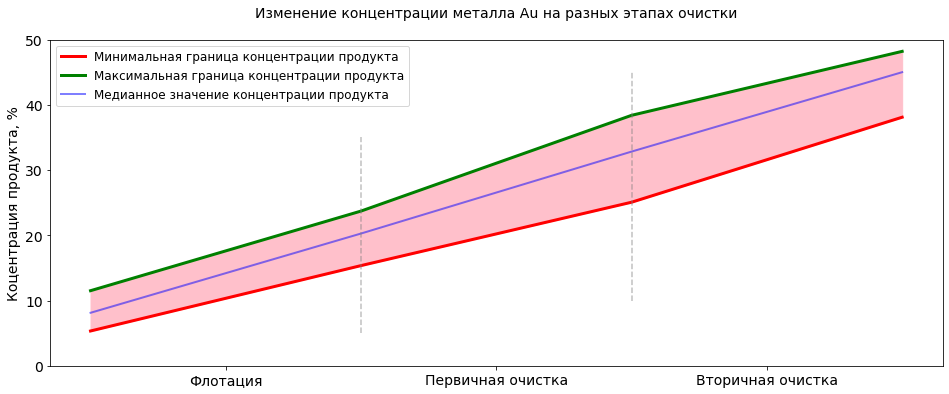

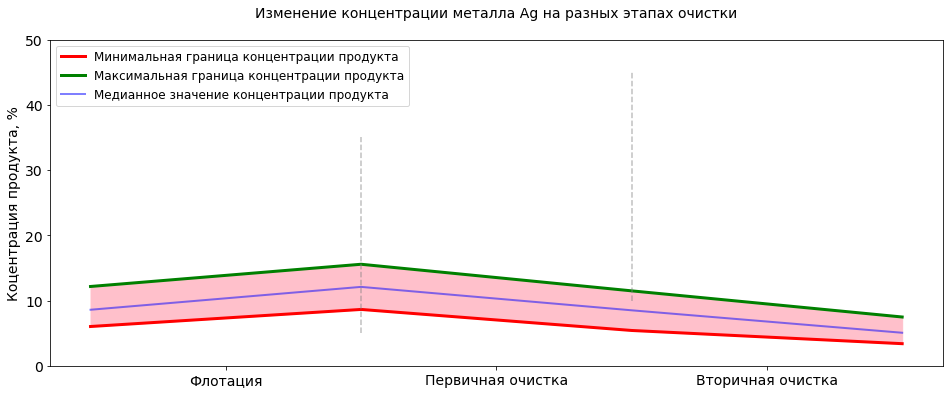

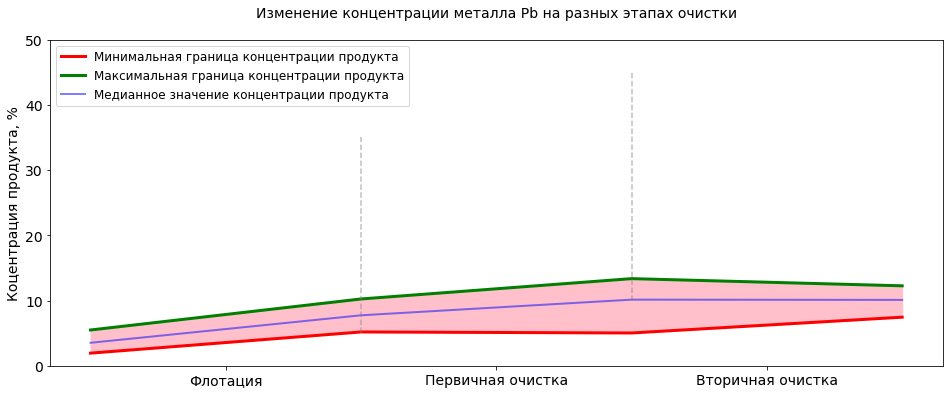

In [16]:
x = [1, 2, 3, 4]
q_min = 0.05
q_max = 0.95

metall = 'ag'

for metall in ['au', 'ag', 'pb']:
    ymin = [data_full['rougher.input.feed_' + metall].quantile(q=q_min),
            data_full['rougher.output.concentrate_' + metall].quantile(q=q_min),
            data_full['primary_cleaner.output.concentrate_' + metall].quantile(q=q_min),
            data_full['final.output.concentrate_' + metall].quantile(q=q_min)
           ]


    ymax = [data_full['rougher.input.feed_' + metall].quantile(q=q_max),
            data_full['rougher.output.concentrate_' + metall].quantile(q=q_max),
            data_full['primary_cleaner.output.concentrate_' + metall].quantile(q=q_max),
            data_full['final.output.concentrate_' + metall].quantile(q=q_max)
           ]

    y_median = [data_full['rougher.input.feed_' + metall].median(),
            data_full['rougher.output.concentrate_' + metall].median(),
            data_full['primary_cleaner.output.concentrate_' + metall].median(),
            data_full['final.output.concentrate_' + metall].median()
           ]
    plt.figure(figsize=(16,6))
    plt.title('Изменение концентрации металла ' + metall.capitalize() + ' на разных этапах очистки', size=14, y=1.05)

    plt.ylim([0,50])
    plt.plot(x, ymin, color='red', linewidth=3)
    plt.plot(x, ymax, color='green', linewidth=3)
    plt.plot(x, y_median, color='blue', linewidth=2, alpha=0.5);
    plt.fill_between(x, ymax, ymin, color='pink')

    plt.axvline(x=2, ymin=0.1, ymax=0.7,  color='grey', alpha=0.5, linestyle='--')
    plt.axvline(x=3, ymin=0.2, ymax=0.9,  color='grey', alpha=0.5, linestyle='--')

    plt.xticks([1.5, 2.5, 3.5], ['Флотация', 'Первичная очистка', 'Вторичная очистка'], size=14)
    plt.ylabel('Коцентрация продукта, %', size=14)
    plt.yticks(size=14)

    plt.legend(['Минимальная граница концентрации продукта', 
                'Максимальная граница концентрации продукта', 
                'Медианное значение концентрации продукта'], loc='upper left', fontsize=12);

***Вывод***

На каждом этапе концентрация золота повышается. После первичной очистки, если верить данным, можно получить концентрацию золота даже ниже, чем после флотации, однако если отбросить по 5% выбросов с каждой стороны, ширина коридора становится приемлемой. Дополнительно заметим, что с каждым этапом понижается концентрация серебра - оно попадает в отвальные хвосты. Концентрация свинца в продукте немного увеличивается.

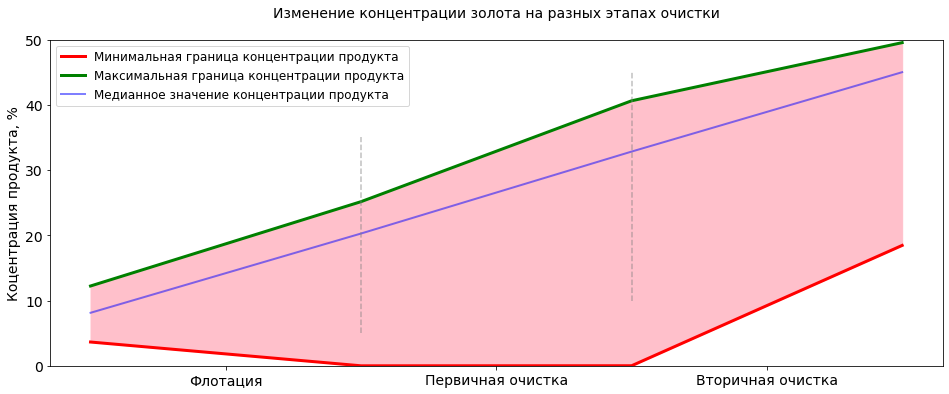

In [17]:
x = [1, 2, 3, 4]
q_min = 0.01
q_max = 0.99

metall = 'au'

ymin = [data_full['rougher.input.feed_' + metall].quantile(q=q_min),
        data_full['rougher.output.concentrate_' + metall].quantile(q=q_min),
        data_full['primary_cleaner.output.concentrate_' + metall].quantile(q=q_min),
        data_full['final.output.concentrate_' + metall].quantile(q=q_min)
       ]


ymax = [data_full['rougher.input.feed_' + metall].quantile(q=q_max),
        data_full['rougher.output.concentrate_' + metall].quantile(q=q_max),
        data_full['primary_cleaner.output.concentrate_' + metall].quantile(q=q_max),
        data_full['final.output.concentrate_' + metall].quantile(q=q_max)
       ]

y_median = [data_full['rougher.input.feed_' + metall].median(),
        data_full['rougher.output.concentrate_' + metall].median(),
        data_full['primary_cleaner.output.concentrate_' + metall].median(),
        data_full['final.output.concentrate_' + metall].median()
           ]

plt.figure(figsize=(16,6))
plt.title('Изменение концентрации золота на разных этапах очистки', size=14, y=1.05)

plt.ylim([0,50])
plt.plot(x, ymin, color='red', linewidth=3)
plt.plot(x, ymax, color='green', linewidth=3)
plt.plot(x, y_median, color='blue', linewidth=2, alpha=0.5);
plt.fill_between(x, ymax, ymin, color='pink')

plt.axvline(x=2, ymin=0.1, ymax=0.7,  color='grey', alpha=0.5, linestyle='--')
plt.axvline(x=3, ymin=0.2, ymax=0.9,  color='grey', alpha=0.5, linestyle='--')

plt.xticks([1.5, 2.5, 3.5], ['Флотация', 'Первичная очистка', 'Вторичная очистка'], size=14)
plt.ylabel('Коцентрация продукта, %', size=14)
plt.yticks(size=14)

plt.legend(['Минимальная граница концентрации продукта', 
            'Максимальная граница концентрации продукта', 
            'Медианное значение концентрации продукта'], loc='upper left', fontsize=12);

Наблюдения, в которых концентрация золота после первичной очистки уменьшилась

In [18]:
data_full[data_full['rougher.input.feed_au'] > data_full['primary_cleaner.output.concentrate_au']].shape[1]

87

### Изучение распределения размеров гранул

Напишем функцию, отсекающую одинаковые квантили с обеих сторон распределения

In [19]:
def tail_cut(data, tail_to_cut):
    return data[(data>data.quantile(tail_to_cut)) & (data<data.quantile(1-tail_to_cut))]

Сравним средние и медианные значения размеров гранул и выведем их распределения.

In [20]:
qcut = 0.03
print('Среднее значение размеров гранул в обучающей выборке:', tail_cut(data_train['rougher.input.feed_size'], qcut).mean())
print('Среднее значение размеров гранул в тестовой выборке:', tail_cut(data_test['rougher.input.feed_size'], qcut).mean())
print('Медианное значение размеров гранул в обучающей выборке:', tail_cut(data_train['rougher.input.feed_size'], qcut).median())
print('Медианное значение размеров гранул в тестовой выборке:', tail_cut(data_test['rougher.input.feed_size'], qcut).median())

Среднее значение размеров гранул в обучающей выборке: 58.32680748968437
Среднее значение размеров гранул в тестовой выборке: 54.469690395823754
Медианное значение размеров гранул в обучающей выборке: 55.33515588639626
Медианное значение размеров гранул в тестовой выборке: 50.8468431600362


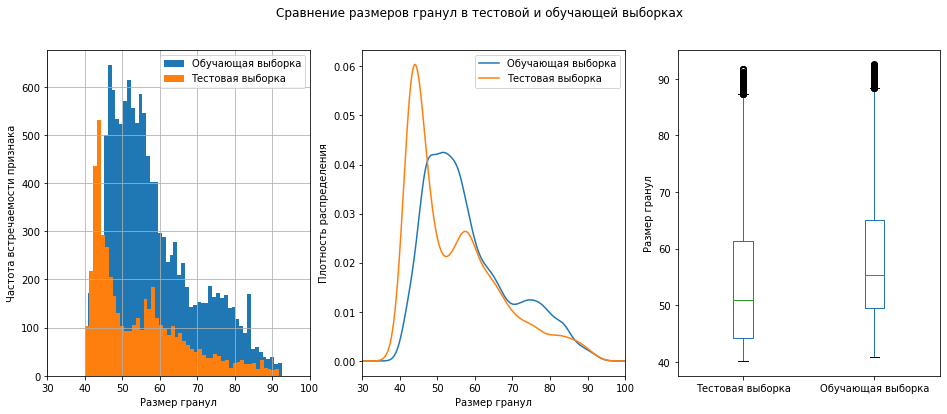

In [21]:
plt.figure(figsize=(16,6))
plt.suptitle('Сравнение размеров гранул в тестовой и обучающей выборках')

ax1 = plt.subplot(1,3,1)

tail_cut(data_train['rougher.input.feed_size'], qcut).hist(bins=50, ax=ax1)
tail_cut(data_test['rougher.input.feed_size'], qcut).hist(bins=50, ax=ax1);
plt.xlabel('Размер гранул')
plt.ylabel('Частота встречаемости признака');
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.xlim([30, 100])

ax2 = plt.subplot(1,3,2)
tail_cut(data_train['rougher.input.feed_size'], qcut).plot.kde(ax=ax2);
tail_cut(data_test['rougher.input.feed_size'], qcut).plot.kde(ax=ax2);
plt.xlabel('Размер гранул')
plt.ylabel('Плотность распределения');
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.xlim([30, 100])


ax3 = plt.subplot(1,3,3)
pd.DataFrame(data= {'Тестовая выборка': tail_cut(data_test['rougher.input.feed_size'], qcut), 
                    'Обучающая выборка': tail_cut(data_train['rougher.input.feed_size'], qcut)}).plot.box(ax=ax3);

plt.ylabel('Размер гранул');

Лишь по средним и медианным значения невозможно дать заключение о принадлежности выборок одной генеральной совокупности. Гистограмма и диаграмма распределения тоже хоть и непохожи, но однозначный вывод сделать не дают. Поэтому необходимо провести проверку гипотезы о принадлежности выборок одной генеральной совокупности и вычислить t-критерий Стъюдента.

In [22]:
ttest_ind(data_test['rougher.input.feed_size'], data_train['rougher.input.feed_size'])

Ttest_indResult(statistic=-12.07864903537542, pvalue=1.814274240069592e-33)

In [23]:
ttest_1samp(data_test['rougher.input.feed_size'], data_train['rougher.input.feed_size'].mean())

Ttest_1sampResult(statistic=-16.416977803598073, pvalue=4.10464528561816e-59)

Выборки значимо разнородны. Но тестовая выборка в целом находится внутри обучающей, поэтому модель скорее всего будет нормально обобщена на тестовые данные.

### Исследование суммарной концентрации веществ на разных стадиях

2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Построим распределения суммарной концентрации четырех основных компонентов сырья на разных этапах

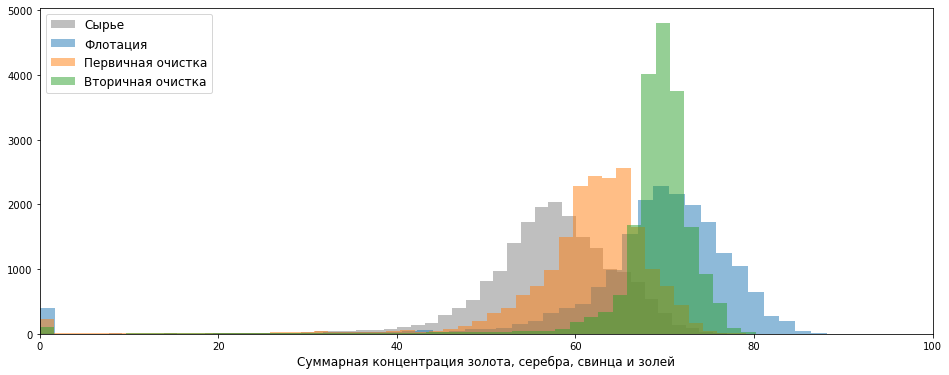

In [24]:
plt.figure(figsize=(16,6))
qmin = 0.00
(
 (data_full['rougher.input.feed_ag']) +
 (data_full['rougher.input.feed_pb']) +
 (data_full['rougher.input.feed_sol']) +
 (data_full['rougher.input.feed_au'])
).hist(bins=50, alpha=0.5, color='grey')


for stage in ['rougher.output', 'primary_cleaner.output', 'final.output']: 
    (
     (data_full[stage + '.concentrate_ag']) + 
     (data_full[stage + '.concentrate_pb']) + 
     (data_full[stage + '.concentrate_sol']) + 
     (data_full[stage + '.concentrate_au'])
    ).hist(bins=50, alpha=0.5, grid=False)
    
plt.xlim([0,100])
plt.xlabel('Суммарная концентрация золота, серебра, свинца и золей', size=12)
plt.legend(['Сырье', 'Флотация','Первичная очистка', 'Вторичная очистка'], loc='upper left', fontsize=12);

Примечательно, что суммарная концентрация основных компонентов руды снижается после первичной очистки. Наверняка это связано с добавлением к сырью реагентов. В продукте средняя концентрация основных компонентов повышается до уровня флотации, но при этом состав продукта оказывается более стабильным. Вероятно, на втором этапе очистки реагенты вымываются вместе с некоторыми побочными металлами, такими как серебро или свинец, и доля золота в итоговом продукте повышается. Это доказывает анализ изменения концентрации на каждом этапе, проведенный ранее.

Также анализ подтвердил наличие выбросов в признаках с концентрацией металлов на каждом этапе.

In [25]:
data_train = data_train[data_train['rougher.input.feed_ag']!=0]
data_train = data_train[data_train['rougher.input.feed_pb']!=0]
data_train = data_train[data_train['rougher.input.feed_sol']!=0]
data_train = data_train[data_train['rougher.input.feed_au']!=0]

data_test = data_test[data_test['rougher.input.feed_ag']!=0]
data_test = data_test[data_test['rougher.input.feed_pb']!=0]
data_test = data_test[data_test['rougher.input.feed_sol']!=0]
data_test = data_test[data_test['rougher.input.feed_au']!=0]

## Построение модели

### Напишите функцию для вычисления sMAPE.

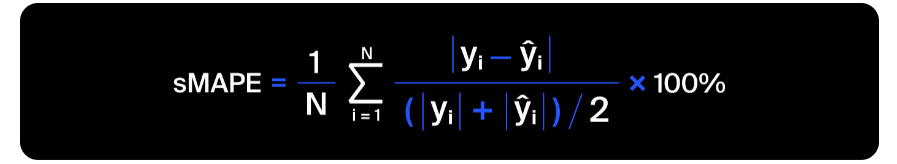

In [26]:
def smape(a, f):
    return (1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100))

Метрику будет нужно использовать в моделях обучения, поэтому сделаем из smape пользовательскую метрику качества модели

In [27]:
smape_scorer = make_scorer(score_func=smape, greater_is_better=False)

### Обучение моделей

#### Обучение модели для предсказания признака `rougher.output.recovery`

In [28]:
data_train_features = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
data_train_target = data_train['rougher.output.recovery']

data_test_features = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
data_test_target = data_test['rougher.output.recovery']

***Линейная регрессия***

Построим пайплайн, который позволит в рамках кросс-валидации последовательно заполнить нули медианой, отмасштабировать данные и обучить модель линейной регрессии с обоими типами регуляризации, которые мы переберем при помощи GridSearchCV.

In [29]:
pipe = Pipeline(steps = [('imputer', SimpleImputer(missing_values=0, strategy='median')), 
                         ('scaler', StandardScaler()),
                         ('model', ElasticNet())])

parameters = {'model__alpha': np.arange(0.1,1,0.1), 'model__l1_ratio': np.arange(0.1,1,0.1)}
gridsearch = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=smape_scorer, cv=5, n_jobs=-1)
study = gridsearch.fit(data_train_features, data_train_target)
pd.DataFrame(study.cv_results_).drop('params', axis=1).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.329718,0.033067,0.013961,0.001670,0.3,0.1,-8.342390,-5.771219,-4.731372,-4.452855,-7.062666,-6.072100,1.459142,1
27,0.301988,0.013694,0.020546,0.014254,0.4,0.1,-8.444873,-5.802429,-4.709901,-4.450295,-6.963865,-6.074273,1.482149,2
36,0.322332,0.038579,0.013763,0.001163,0.5,0.1,-8.503358,-5.806273,-4.711600,-4.460625,-6.902996,-6.076971,1.491292,3


Отрицательный знак - это формальность, связанная с тем, что пользовательская функция минимизирует метрику.

In [30]:
model = study.best_estimator_
model.fit(data_train_features, data_train_target)
predicted = model.predict(data_test_features)
lr_smape1 = smape(data_test_target, predicted)
print(lr_smape1)

7.96470065237331


Построим барчарт с распределением коэффициентов линейной регрессии

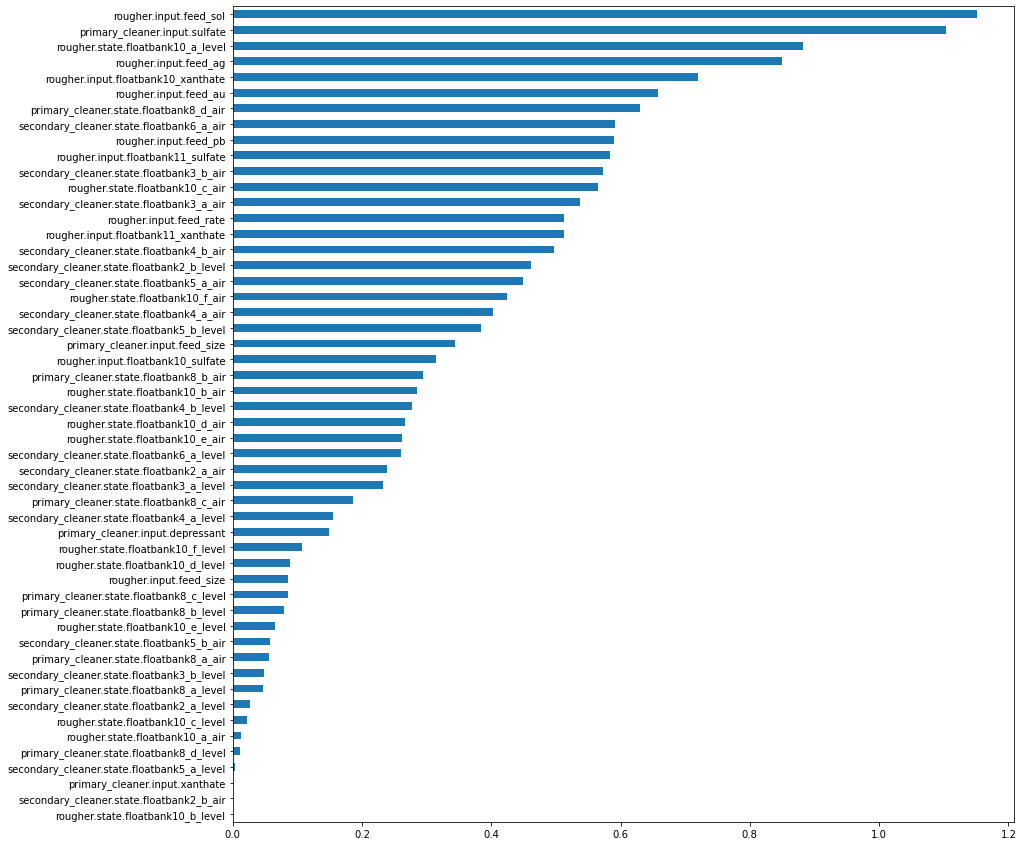

In [31]:
plt.figure(figsize=(14,15))
ax = plt.subplot(1,1,1)
pd.Series(abs(study.best_estimator_[2].coef_), index=data_train_features.columns).sort_values(ascending=True).plot(kind='barh', ax=ax);

Некоторым признакам линейная регрессия присвоила нулевые коэффициенты, поскольку они явно являлись линейными комбинациями каких-то других признаков. Выделим ненулевые признаки в отдельный список и воспользуемся ими для построения остальных моделей

In [32]:
significant_features = pd.Series(abs(study.best_estimator_[2].coef_), index=data_train_features.columns).sort_values(ascending=False)[:-3].index

***Дерево решений и случайный лес***

In [33]:
def objective(trial):

    classifier_name = trial.suggest_categorical("Алго", ['DecisionTreeRegressor', 
                                                         'RandomForestRegressor',])
    
    if classifier_name == "DecisionTreeRegressor":
        max_depth = trial.suggest_int("Глубина", 2, 15)
        model = DecisionTreeRegressor(max_depth=max_depth, random_state=321)
        
    else:
        n_estimators = trial.suggest_int("Число деревьев", 2, 15)
        max_depth = trial.suggest_int("Глубина", 2, 15)
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=321)

    res = abs(cross_val_score(model, data_train_features[significant_features], 
                              data_train_target, cv=3, scoring=smape_scorer, n_jobs=-1).mean())
    
    return res

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=120)

[I 2022-03-08 06:39:52,293] A new study created in memory with name: no-name-18018960-4127-48e7-8842-24a9d48334ce
[I 2022-03-08 06:39:52,806] Trial 0 finished with value: 9.080656834661424 and parameters: {'Алго': 'DecisionTreeRegressor', 'Глубина': 11}. Best is trial 0 with value: 9.080656834661424.
[I 2022-03-08 06:39:53,339] Trial 1 finished with value: 8.660660564352087 and parameters: {'Алго': 'DecisionTreeRegressor', 'Глубина': 12}. Best is trial 1 with value: 8.660660564352087.
[I 2022-03-08 06:39:54,356] Trial 2 finished with value: 8.741321921831215 and parameters: {'Алго': 'RandomForestRegressor', 'Число деревьев': 5, 'Глубина': 8}. Best is trial 1 with value: 8.660660564352087.
[I 2022-03-08 06:39:54,593] Trial 3 finished with value: 8.149693100356483 and parameters: {'Алго': 'DecisionTreeRegressor', 'Глубина': 2}. Best is trial 3 with value: 8.149693100356483.
[I 2022-03-08 06:39:56,080] Trial 4 finished with value: 8.321200114945091 and parameters: {'Алго': 'RandomForestRe

[I 2022-03-08 06:40:23,832] Trial 37 finished with value: 8.21404116771951 and parameters: {'Алго': 'DecisionTreeRegressor', 'Глубина': 3}. Best is trial 16 with value: 7.679373169780167.
[I 2022-03-08 06:40:24,236] Trial 38 finished with value: 7.766703356760661 and parameters: {'Алго': 'RandomForestRegressor', 'Число деревьев': 5, 'Глубина': 2}. Best is trial 16 with value: 7.679373169780167.
[I 2022-03-08 06:40:27,493] Trial 39 finished with value: 8.40814359646729 and parameters: {'Алго': 'RandomForestRegressor', 'Число деревьев': 13, 'Глубина': 11}. Best is trial 16 with value: 7.679373169780167.
[I 2022-03-08 06:40:27,869] Trial 40 finished with value: 8.287612457708011 and parameters: {'Алго': 'DecisionTreeRegressor', 'Глубина': 5}. Best is trial 16 with value: 7.679373169780167.
[I 2022-03-08 06:40:28,224] Trial 41 finished with value: 7.754402681004746 and parameters: {'Алго': 'RandomForestRegressor', 'Число деревьев': 4, 'Глубина': 2}. Best is trial 16 with value: 7.679373169

[I 2022-03-08 06:40:56,832] Trial 75 finished with value: 8.038415559561946 and parameters: {'Алго': 'RandomForestRegressor', 'Число деревьев': 12, 'Глубина': 3}. Best is trial 16 with value: 7.679373169780167.
[I 2022-03-08 06:40:57,555] Trial 76 finished with value: 7.682269573253514 and parameters: {'Алго': 'RandomForestRegressor', 'Число деревьев': 11, 'Глубина': 2}. Best is trial 16 with value: 7.679373169780167.
[I 2022-03-08 06:40:58,522] Trial 77 finished with value: 7.997289423778272 and parameters: {'Алго': 'RandomForestRegressor', 'Число деревьев': 11, 'Глубина': 3}. Best is trial 16 with value: 7.679373169780167.
[I 2022-03-08 06:41:01,081] Trial 78 finished with value: 8.48223732291395 and parameters: {'Алго': 'RandomForestRegressor', 'Число деревьев': 12, 'Глубина': 9}. Best is trial 16 with value: 7.679373169780167.
[I 2022-03-08 06:41:01,316] Trial 79 finished with value: 8.149693100356483 and parameters: {'Алго': 'DecisionTreeRegressor', 'Глубина': 2}. Best is trial 16

In [34]:
display(study.best_trial.params, study.best_trial.values[0])

{'Алго': 'RandomForestRegressor', 'Число деревьев': 12, 'Глубина': 2}

7.679373169780167

In [35]:
best_trial_params = (study.best_trial.params, study.best_trial.values[0])[0]

In [36]:
if best_trial_params['Алго']=='RandomForestRegressor':
    best_model = RandomForestRegressor(n_estimators=best_trial_params['Число деревьев'], max_depth=best_trial_params['Глубина'])
else:
    best_model = DecisionTreeRegressor(max_depth=best_trial_params['Глубина'])
    
best_model.fit(data_train_features[significant_features], data_train_target)
predicted = best_model.predict(data_test_features[significant_features])
smape_score = abs(smape(data_test_target, predicted))
print(smape_score)

8.432888389427385


In [37]:
woods_smape1 = smape_score
rougher_output_recovery_smape = min(lr_smape1, woods_smape1)
rougher_output_recovery_smape

7.96470065237331

Похоже, что линейная регрессия оказалась наилучшей моделью

#### Обучение модели для предсказания признака `final.output.recovery`

Для предсказания второго признака проделаем те же действия: построим модель линейной регрессии и определим наиболее значимые признаки. Несмотря на то, что многие признаки визуально имеют высокую мультиколлинеарность, обучение модели на предсказание предыдущего таргета показало, что доля L1-регуляризации в ElasticNet невысока, и отброшены были лишь несколько признаков. Плэтому воспользуемся моделью с L2-регуляризацией.

In [38]:
data_train_features = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
data_train_target = data_train['final.output.recovery']

data_test_features = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
data_test_target = data_test['final.output.recovery']

In [39]:
pipe = Pipeline(steps = [('imputer', SimpleImputer(missing_values=0, strategy='median')), 
                         ('scaler', StandardScaler()),
                         ('model', ElasticNet())])

parameters = {'model__alpha': np.arange(0.1,1,0.1), 'model__l1_ratio': np.arange(0.1,1,0.1)}
gridsearch = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=smape_scorer, cv=5, n_jobs=-1)
study = gridsearch.fit(data_train_features, data_train_target)
pd.DataFrame(study.cv_results_).drop('params', axis=1).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
69,0.244344,0.007725,0.012367,0.000798,0.8,0.7,-9.983914,-8.413408,-8.764741,-9.233568,-10.057912,-9.290709,0.650953,1
79,0.231781,0.020444,0.010171,0.001934,0.9,0.8,-9.844031,-8.368988,-8.774000,-9.364413,-10.102506,-9.290788,0.646091,2
70,0.247935,0.008167,0.013563,0.001954,0.8,0.8,-9.901335,-8.407148,-8.783337,-9.283996,-10.079229,-9.291009,0.637617,3


In [40]:
model = study.best_estimator_
model.fit(data_train_features, data_train_target)
predicted = model.predict(data_test_features)
lr_smape2 = smape(data_test_target, predicted)
print(lr_smape2)

8.702958188273021


<AxesSubplot:>

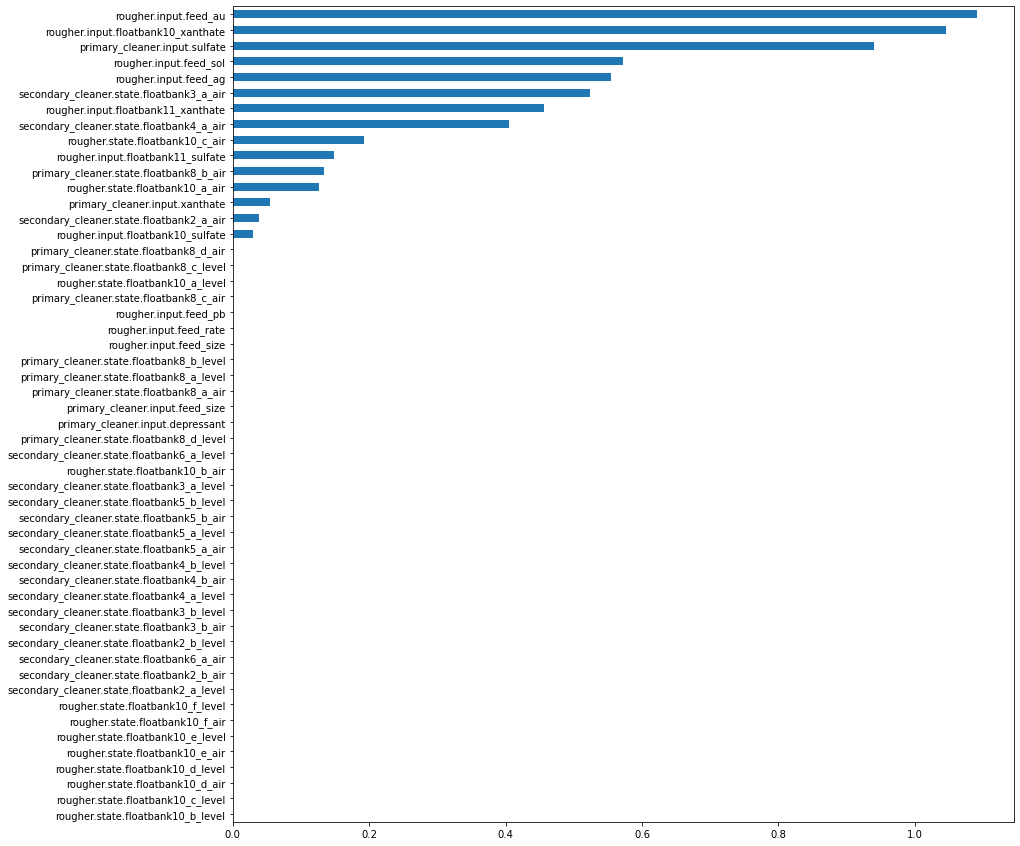

In [41]:
plt.figure(figsize=(14,15))
ax = plt.subplot(1,1,1)
pd.Series(abs(study.best_estimator_[2].coef_), index=data_train_features.columns).sort_values(ascending=True).plot(kind='barh', ax=ax)

В случае со второй предсказываемой величиной значимых коэффициентов оказалось гораздо меньше

In [42]:
temp = pd.Series(abs(study.best_estimator_[2].coef_), index=data_train_features.columns).sort_values(ascending=True)
significant_features = temp[temp!=0].index

***Дерево решений***

In [43]:
model = DecisionTreeRegressor()
parameters = {'max_depth': range(2, 15)}
study = GridSearchCV(estimator=model, param_grid=parameters, scoring=smape_scorer, cv=5, n_jobs=-1)
study.fit(data_train_features[significant_features], data_train_target);

In [44]:
pd.DataFrame(study.cv_results_).drop('params', axis=1).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.109904,0.004155,0.003989,3.504023e-07,4,-9.570110,-8.087567,-8.989835,-8.940475,-10.205454,-9.158688,0.705467,1
1,0.082777,0.003154,0.004986,1.092362e-03,3,-9.512554,-7.995938,-9.417556,-9.267892,-10.189924,-9.276773,0.714125,2
0,0.054439,0.001618,0.004389,7.981303e-04,2,-9.756500,-7.783666,-9.087021,-9.449638,-10.713348,-9.358035,0.954581,3


In [45]:
model = study.best_estimator_
model.fit(data_train_features[significant_features], data_train_target)
predicted = model.predict(data_test_features[significant_features])
dt_smape2 = smape(data_test_target, predicted)
print(dt_smape2)

10.174292996274465


***Случайный лес***

Определим важные признаки для модели случайного леса при помощи `Feature permutation`

In [46]:
forest = RandomForestRegressor(random_state=321, n_jobs=-1)
forest.fit(data_train_features, data_train_target)
importances = forest.feature_importances_

In [47]:
result = permutation_importance(forest, data_train_features, data_train_target, n_repeats=10, random_state=321, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=data_train_features.columns).sort_values(ascending=False)

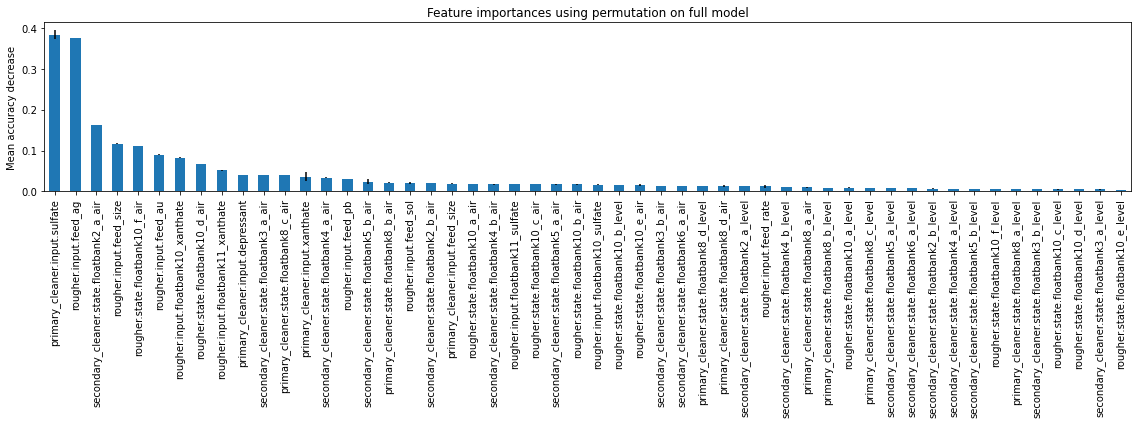

In [48]:
fig, ax = plt.subplots(figsize=(16,6))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

In [49]:
significant_features = forest_importances[:15].index

In [50]:
model = RandomForestRegressor(random_state=321)
parameters = {'max_depth':range(2, 15), 'n_estimators': range(4, 12)}
study = GridSearchCV(estimator=model, param_grid=parameters, scoring=smape_scorer, cv=5, n_jobs=-1)
study.fit(data_train_features[significant_features], data_train_target);

In [51]:
model = study.best_estimator_
model.fit(data_train_features[significant_features], data_train_target)
predicted = model.predict(data_test_features[significant_features])
rf_smape2 = smape(data_test_target, predicted)
print(rf_smape2)

9.376914610057517


In [52]:
final_output_recovery_smape = min(lr_smape2, dt_smape2, rf_smape2)
final_output_recovery_smape 

8.702958188273021

#### Расчет финального sMAPE

Рассчитаем метрику `final_smape`
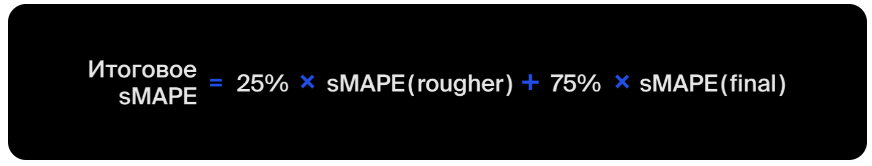

In [53]:
final_smape = 0.25*rougher_output_recovery_smape + 0.75*final_output_recovery_smape
final_smape

8.518393804298093

#### Проверка модели на адекватность

Проведем проверку на адекватность, сравним точность предсказания полученной модели с ответом средним.

In [54]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(data_train_features, data_train_target)
dummy_predicted = dummy.predict(data_test_features)
print(smape(data_test_target, dummy_predicted))

10.074847136380473


## Вывод

* Основную проблему для построения эффективной модели составляют выбросы
* Наиболее эффективной в обоих случаях оказалась модель линейной регрессии. Финальное значение sMAPE составило 0.085, что лучше предсказания средним.
* Дальнейшее увеличение эффективности возможно при более тщательном подборе важных признаков и очистки обучающих данных исходя из них, а также работе с коррелирующими признаками.